In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
from matplotlib.colors import ListedColormap

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11128\1737986675.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == i, 0], X_set[y_set == i, 1], c = ListedColormap(("red", "blue"))(i), label = i)


Text(0.5, 1.0, 'K-Nearest Neighbors(KNN) (Test Set)')

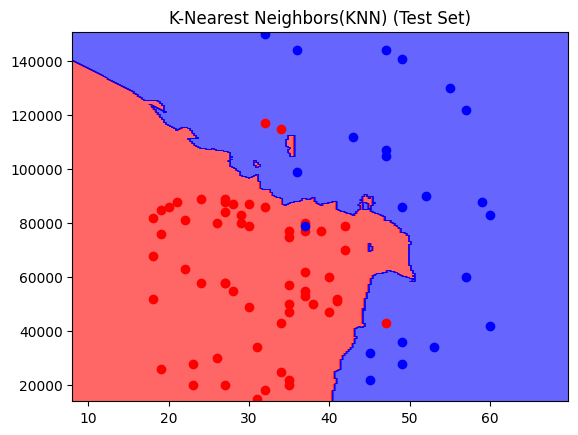

In [11]:
X_set, y_set = scaler.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min()-10, X_set[:, 0].max()+10, 0.25),
                     np.arange(X_set[:, 1].min()-1000, X_set[:, 1].max()+1000, 25))
all_points = np.array([X1.ravel(), X2.ravel()]).T
plt.contourf(X1, X2, classifier.predict(scaler.transform(all_points)).reshape(X1.shape), alpha = 0.6, cmap = ListedColormap(("red", "blue")))
for i in range(0,2):
    plt.scatter(X_set[y_set == i, 0], X_set[y_set == i, 1], c = ListedColormap(("red", "blue"))(i), label = i)
plt.title("K-Nearest Neighbors(KNN) (Test Set)")